# Correlation

- Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable.

- Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. 

- If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.



## KEY TERMS FOR CORRELATION
### Correlation coefficient
- A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).

### Correlation matrix
- A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.

### Scatterplot
- A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

In [42]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.colors as mcolors

In [10]:
Sp500_scs = pd.read_csv(r'G:\data_science\data\sp500_sectors.csv')
Sp500_data = pd.read_csv(r'G:\data_science\data\sp500_data.csv', index_col=0)


In [18]:
Sp500_scs

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [21]:
Sp500_scs.nunique()

sector           11
sector_label     11
sub_sector      135
symbol          517
dtype: int64

In [20]:
for i in Sp500_scs:
    print("Categories in '{0}' variable:     ".format(i),end=" " )
    print(Sp500_scs[i].unique())
    

Categories in 'sector' variable:      ['information_technology' 'industrials' 'energy' 'consumer_discretionary'
 'utilities' 'materials' 'etf' 'telecommunications_services'
 'consumer_staples' 'financials' 'health_care']
Categories in 'sector_label' variable:      ['Technology' 'Industrials' 'Energy' 'Consumer\nDiscretionary' 'Utilities'
 'Materials' 'EFTs' 'Telecom' 'Consumer\nStaples' 'Financials'
 'Health Care']
Categories in 'sub_sector' variable:      ['data_processing_&_outsourced_services' 'systems_software'
 'it_consulting_&_services' 'semiconductors' 'computer_hardware'
 'home_entertainment_software' 'computer_storage_&_peripherals'
 'electronic_equipment_&_instruments' 'telecommunications_equipment'
 'it_consulting_&_other_services' 'semiconductor_equipment'
 'application_software' 'internet_software_&_services'
 'networking_equipment' 'office_services_&_supplies'
 'human_resource_&_employment_services' 'construction_&_engineering'
 'diversified_commercial_services' 'research

In [19]:
Sp500_data

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [11]:
telecom_symbols=Sp500_scs[Sp500_scs['sector']=='telecommunications_services']['symbol']

In [12]:
telecom=Sp500_data.loc[Sp500_data.index>='2012-07-01',telecom_symbols]

In [17]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [24]:
etfs = Sp500_data.loc[Sp500_data.index > '2012-07-01', 
                    Sp500_scs[Sp500_scs['sector'] == 'etf']['symbol']]

In [26]:
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


- Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. 
- The seaborn package provides a convenient implementation for heatmaps.

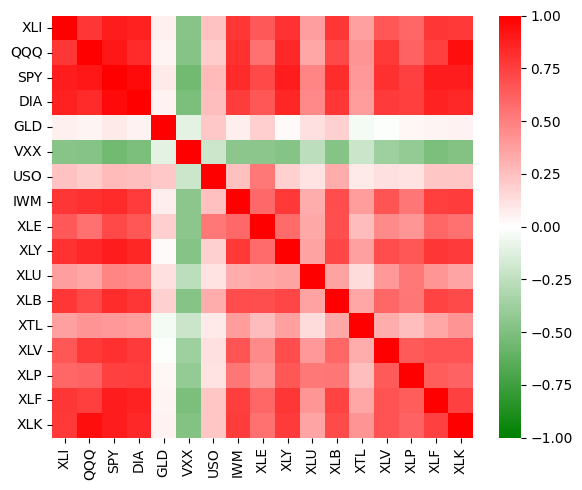

In [45]:
fig,ax=plt.subplots(figsize=(6,5))
colors = [(0, 'green'), (0.5, 'white'), (1, 'red')]
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors)
ax=sns.heatmap(etfs.corr(),vmin=-1,vmax=1,cmap=cmap,ax=ax)
plt.tight_layout()
plt.show()

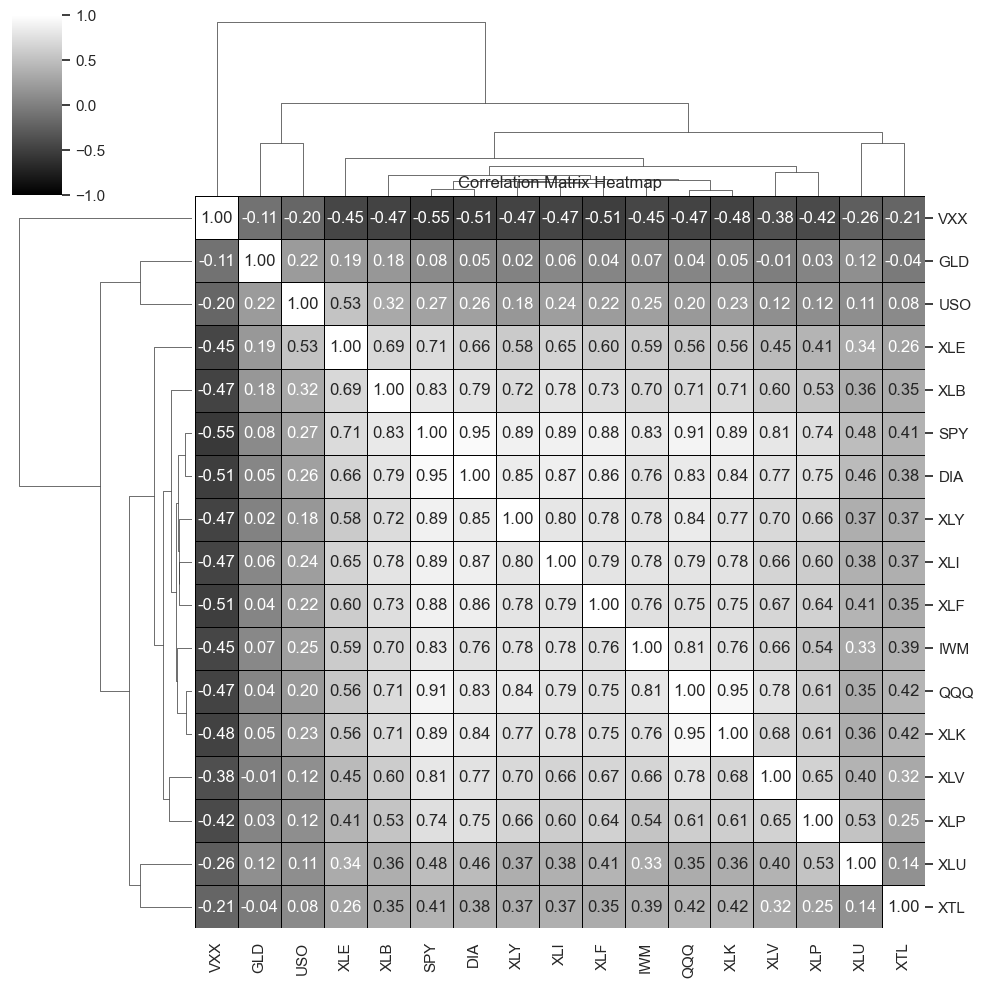

In [67]:
correlation_matrix = etfs.corr()

# Create the greyscale clustermap with correlation values annotated
ax = sns.clustermap(correlation_matrix, cmap='gray', vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=0.5, linecolor='black')

# Set the title of the heatmap
ax.ax_heatmap.set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

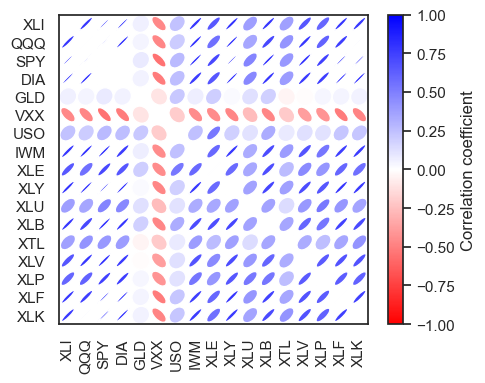

In [49]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

# Scatterplots

- The standard way to visualize the relationship between two measured data variables is with a scatterplot.
- The x-axis represents one variable and the y-axis another, and each point on the graph is a record.

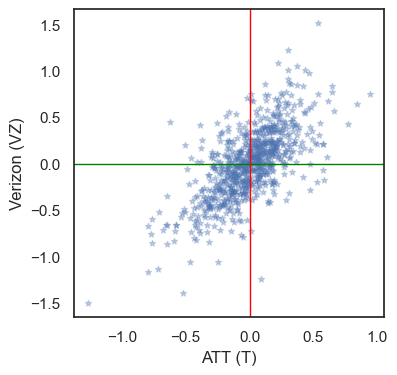

In [66]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='*', alpha=0.3) 
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='green', lw=1)
ax.axvline(0, color='red', lw=1)

## KEY IDEAS
- The correlation coefficient measures the extent to which two paired variables (e.g., height and weight for individuals) are associated with one another.

- When high values of v1 go with high values of v2, v1 and v2 are positively associated.

- When high values of v1 go with low values of v2, v1 and v2 are negatively associated.

- The correlation coefficient is a standardized metric, so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).

- A correlation coefficient of zero indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.